## Assignment 3

This assignmemt is based on content discussed in module 3 and test basic concepts of probability theory and normalization in statistics.

## Learning outcomes

-   Work on problems of different distributions eg., binomial, gaussian 
-   Calculate z score 
-	 Make statistical inferences on given data
-	 Construct a null and an alternate hypothesis
-	 Find the p-value for a given hypothesis and T test statistic.


**Question 1**

The Capital Asset Pricing Model (CAPM) is a financial model that assumes returns on a portfolio are normally distributed.  Suppose a portfolio has an average annual return of 14.7% (i.e., an average gain on 14.7%) with a standard deviation of 33%.  A return of 0% means the value of the portfolio doesn't change, a negative return means that the portfolio loses money, and a positive return means that the portfolio gains money. Determine the following:

1. What percentage of years does this portfolio lose money, (i.e. have a return less than 0%)?
2. What is the cutoff for the highest 15% of annual returns with this portfolio?

See CAPM here https://en.wikipedia.org/wiki/Capital_asset_pricing_model 

**Question 2**

Past experience indicates that because of low morale, a company loses 20 hours a year per employee due to lateness and abstenteeism.  Assume that the standard deviation of the population is 6 and normally distributed.

The HR department implemented a new rewards system to increase employee morale, and after a few months it collected a random sample of 20 employees and the annualized absenteeism was 14.

1. Could you confirm that the new rewards system was effective with a 90% confidence?
2. An HR subject matter expert would be very happy if the program could reduce absenteeism by 20% (i.e. to 16 hours).  Given the current sampling parameters, what is the probability that the new rewards system reduced absenteeism to 16 hours and you miss it?
3. Repeat part 1) and 2) with an α = 95% CI.
4. Based on the answers in 3), is the sampling method good enough to identify a reduction from 20 to 16 hours if I use a confidence of 95%?
5. What should the sample size be if you want β to be 5%

**Question 3**

Chi-Square Goodness of fit

Please access and review **section 6.3.5** in the OpenIntro Statistics textbook:

Diez, D., Barr, C. & Çetinkaya-Rundel, M. (2017). OpenIntro Statistics (3rd Ed.). https://www.openintro.org/stat/textbook.php?stat_book=os

Given the information in section 6.3.5, write python code for the following:

 - Calculate the expected values based on the geometric distribution with a probability of 53.2%
 - Compare the expected vs. the observed values from the textbook using the Chi-Square distribution
 - Reach a conclusion
 - Explain what is the business impact of your conclusion

In [272]:
#Q1.1
#H0: r<0
#Ha: r>=0

from scipy import stats
r=0
mu=0.147
sigma=0.33

zscore = (r - mu) / sigma
zscore

p = stats.norm.cdf(zscore)
p
print(p)
#Comment:32.7% percentage of years it will lose money

0.3279956507031998


In [273]:
#Q1.2
x=0.15
###Here is the answer
p2 = stats.norm.ppf(1-x,loc=mu,scale=sigma)
p2
print(p2)

0.4890230185329506


In [274]:
#Q2.1

from scipy import stats
import math 
x3=14
mu3=20
sigma3=6
smpl_size=20
stderror=sigma3/math.sqrt(smpl_size)

zscore3 = (x3 - mu3) / stderror
zscore3


p3 = stats.norm.cdf(zscore3)
p3
print(p3)

if p3<0.1:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
#p-value is less than significant level, we reject null hypthoesis, conclusion:new rewards system was not effective.

3.872108215522035e-06
reject null hypothesis


In [275]:
#Q2.2
#H0: new system effective
#HA: new system is not effective
from scipy import stats
import math 
mu4=16

zscore4 = (x3 - mu4) / stderror
zscore4
p4 = 1-stats.norm.cdf(zscore4)
p4
print(p4)

if p4<0.1:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
#p-value is more than significant level, we accept null hypthoesis, conclusion:new rewards system was effective.


0.9319814359429281
accept null hypothesis


In [276]:
#Q2.3 part1
p5 = stats.norm.cdf(zscore3)
p5
print(p5)

if p5<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
#p-value is less than significant level, we reject null hypthoesis, conclusion:new rewards system was not effective.

3.872108215522035e-06
reject null hypothesis


In [277]:
#Q2.3 Part2

p6 = 1-stats.norm.cdf(zscore4)
p6
if p6<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
#p-value is more than significant level, we accept null hypthoesis, conclusion:new rewards system was effective.

accept null hypothesis


In [278]:
#Q2.4
#Answer and Analysis
#Based on Q2.2 to Q2.3, new reward system changed to 16 is working effective.

In [279]:
#Q2.5

munew=16
Diffmu=munew-mu3
stderrordiff=math.sqrt((sigma3**2+sigma3**2)/smpl_size)

zscore5 = (0 - Diffmu) / stderrordiff
zscore5

p6 = stats.norm.ppf(1-0.1,zscore5)
p6

print(p6)

if p6<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
# conclusion:new rewards system was effective.

3.38973667232352
accept null hypothesis


In [280]:
#Q3
#H0: The stock market being up or down on a given day is independent from all other days.
#Ha: The stock market being up or down on a given day is not independent from all other days.

table=[(1, 1532),(2, 760),(3, 338),(4, 194),(5, 74),(6, 33),(7, 17)]
import pandas as pd
ab=pd.DataFrame(data=table,columns=['Day','observed'])
p=0.532
total=ab['observed'].sum()
firstsix=ab['Day'].loc[0:5]*ab['observed'].loc[0:5]
six=firstsix.sum()

In [281]:
ab['expected']=0
exp=0
for i in range(6):
    exp=round((((1-p)**((ab['Day'][i])-1))*p)*total)#.astype(int)
    ab['expected'][i]=exp

sevenplus=total-ab['expected'].sum()
Expect.append(sevenplus)
ab['expected'][6]=sevenplus

ab.set_index('Day', inplace=True)
ab.head(10)

,observed,expected
Day,,
1,1532,1568
2,760,734
3,338,344
4,194,161
5,74,75
6,33,35
7,17,31


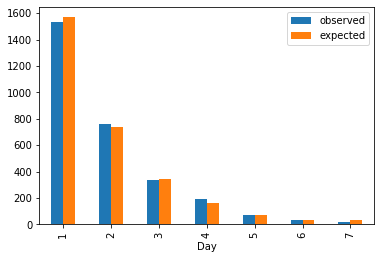

In [282]:
import matplotlib.pyplot as plt
import pandas as pd
ab[['observed','expected']].plot(kind='bar')
plt.legend()
plt.show()

In [283]:
import numpy as np
from scipy.stats import chisquare
test=chisquare(ab['observed'], f_exp=ab['expected'])
print('Chi-square Statistic= %.2f' %test.statistic)#
print('p-value= %.2f' %test.pvalue) 

Chi-square Statistic= 15.07
p-value= 0.02


In [284]:
print('If the null hypothesis is true, i.e. the observed frequencies are equivalent to the expected one, the probability of obtaining our sample is',
       np.round(test.pvalue,2)*100,'%', 'thus we fail to reject the null and state that the observed and expected frequencies are the same.')

If the null hypothesis is true, i.e. the observed frequencies are equivalent to the expected one, the probability of obtaining our sample is 2.0 % thus we fail to reject the null and state that the observed and expected frequencies are the same.
